In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../data/star_classification_10_full_p.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,a,b,c
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002,-0.654218,0.250033,0.713781
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797,0.348727,0.525619,-0.775960
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852,0.450750,0.286260,-0.845505
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515,-0.618062,0.700648,0.356499
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804,0.122096,-0.211234,-0.969780


In [22]:
alpha = df['alpha']
delta = df['delta']
redshift = df['redshift']
a = df['a']
b = df['b']
c = df['c']

light_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']
colors = ['inferno', 'inferno', 'inferno', 'inferno', 'inferno']

In [23]:
def plot_doido(criterion : pd.Series, color : str = 'hot'):
    # Plot em 3D com cores baseadas no redshift
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    if not color == None:
        sc = ax.scatter(a, b, c, c=criterion, cmap=color, marker='.')
    else:
        sc = ax.scatter(a, b, c, color='red', marker='.')
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('C')
    ax.set_title(f'Conversão de Coordenadas Esféricas para Coordenadas Cartesianas com Cor Baseada em {criterion.name}')
    fig.colorbar(sc, label=criterion.name)
    plt.show()

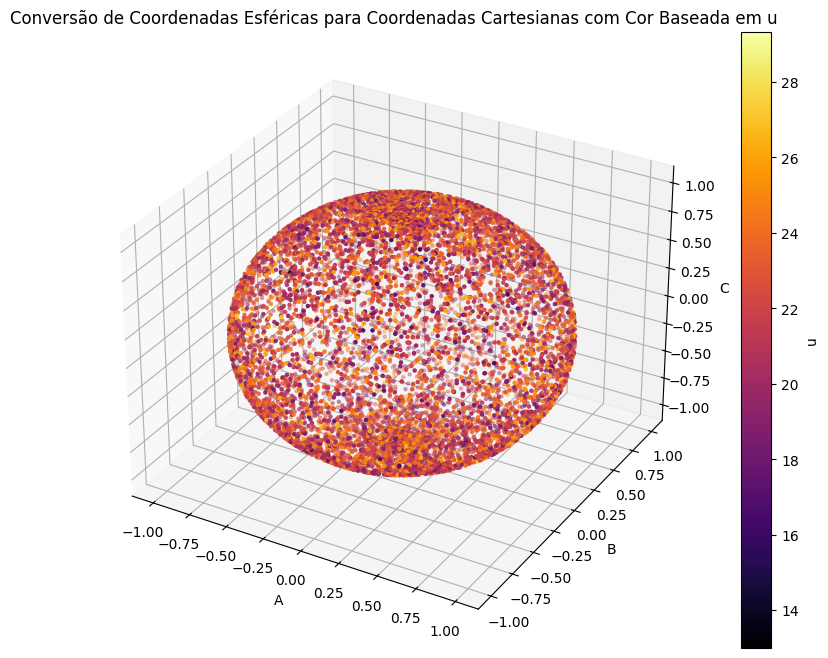

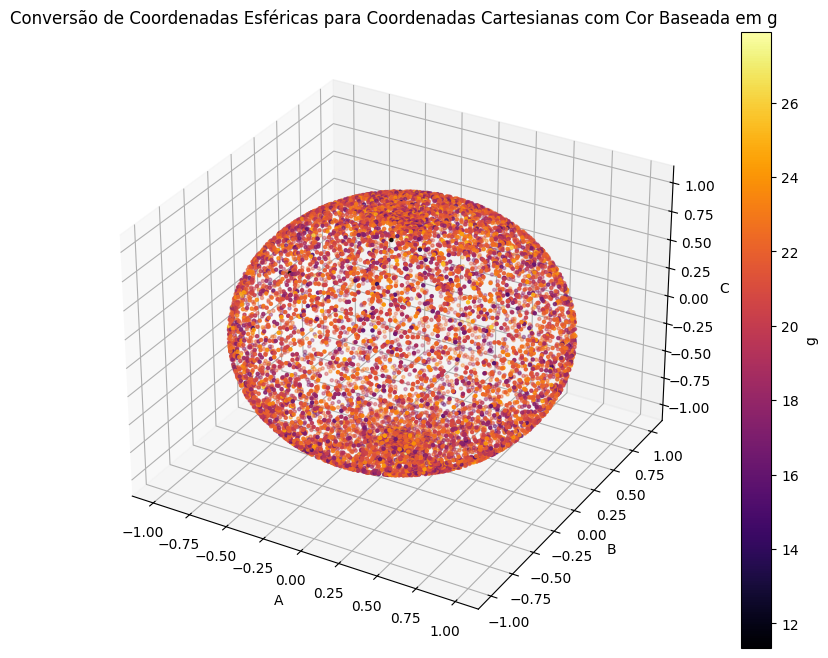

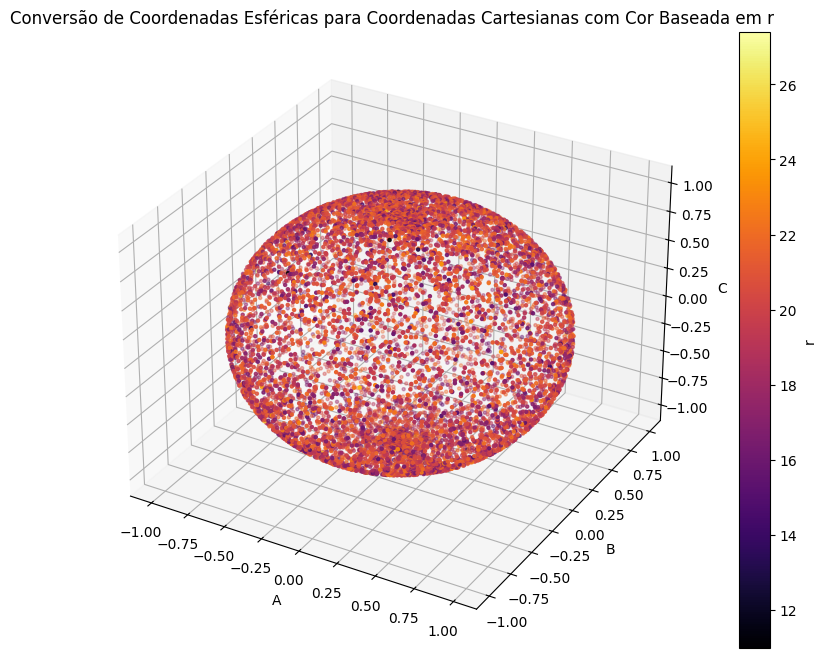

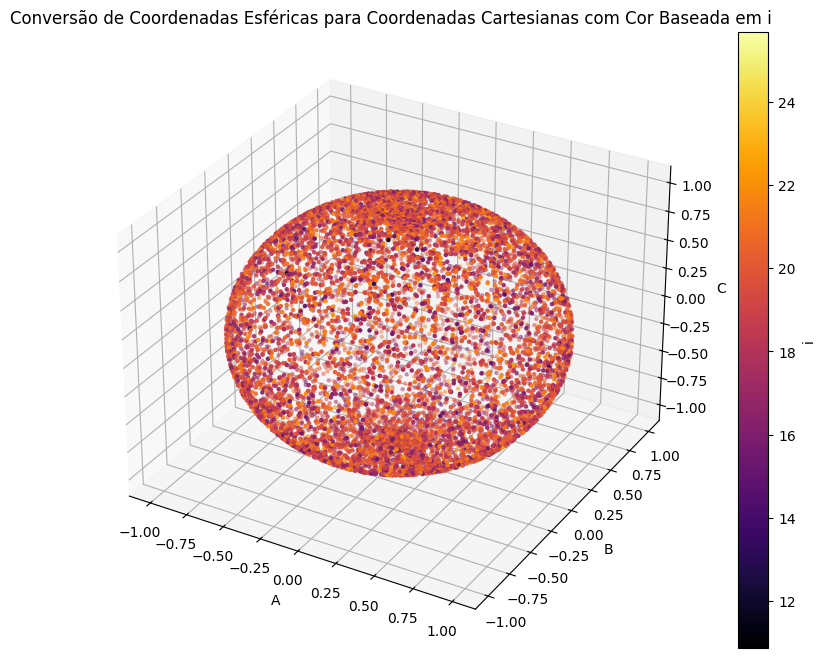

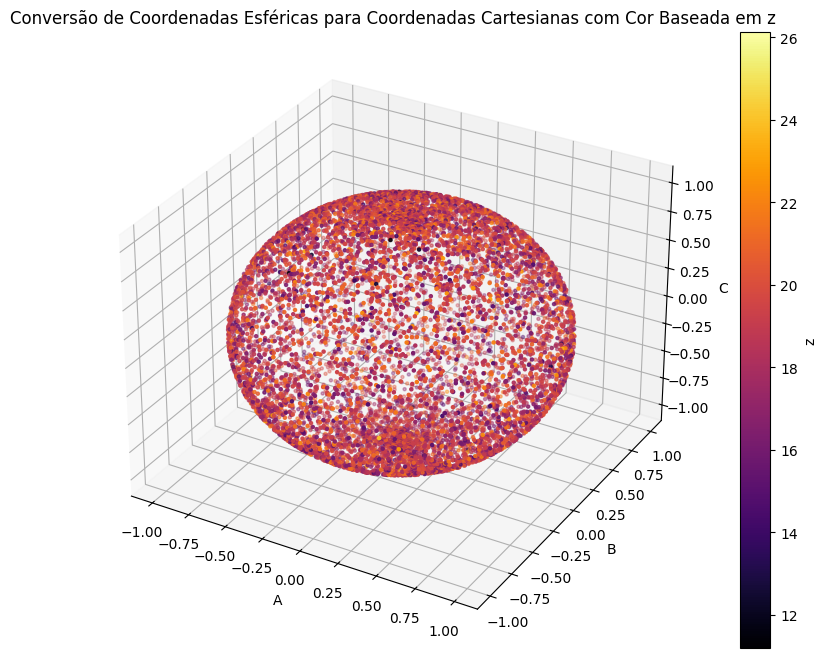

In [24]:
for c1, c2 in zip(light_cols, colors):
    plot_doido(df[c1], c2)

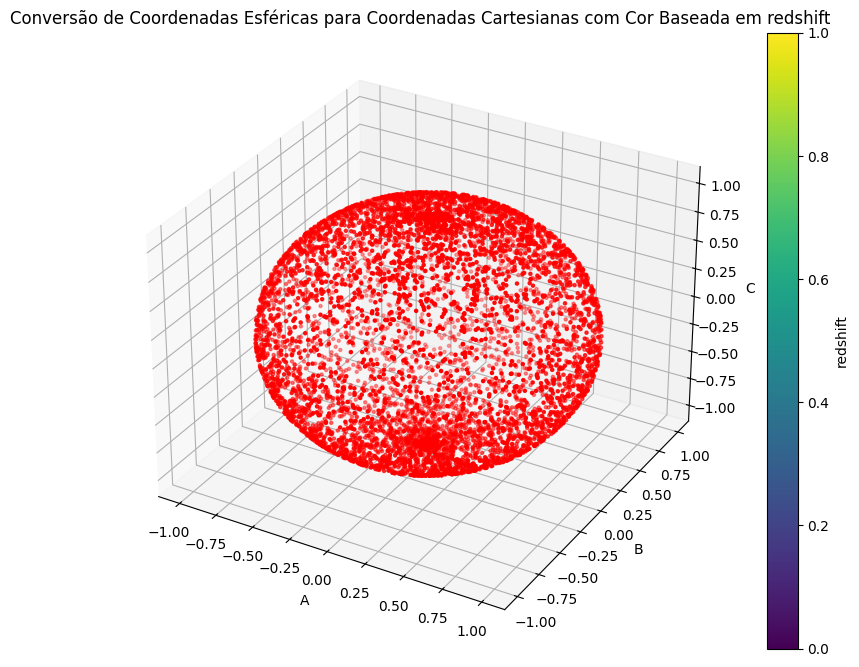

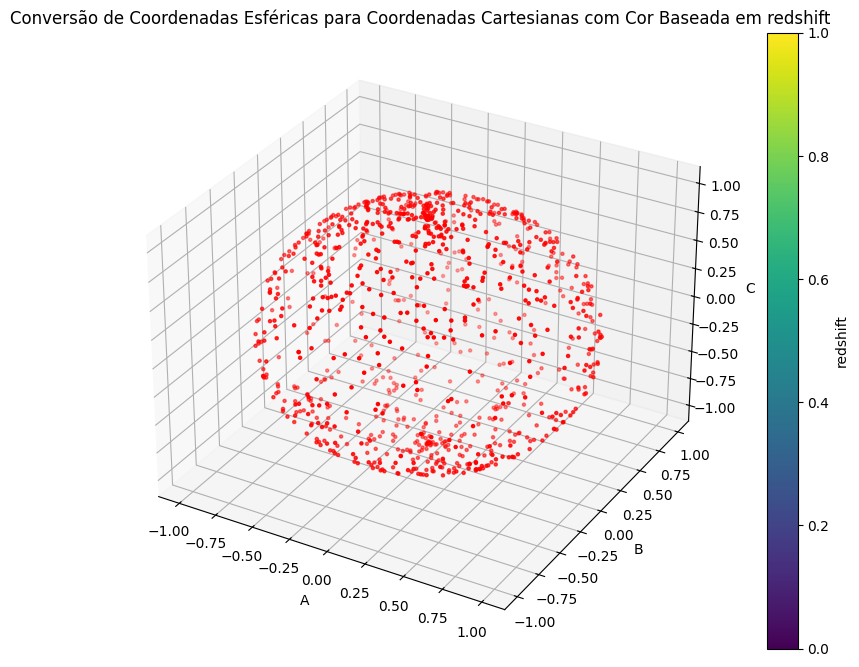

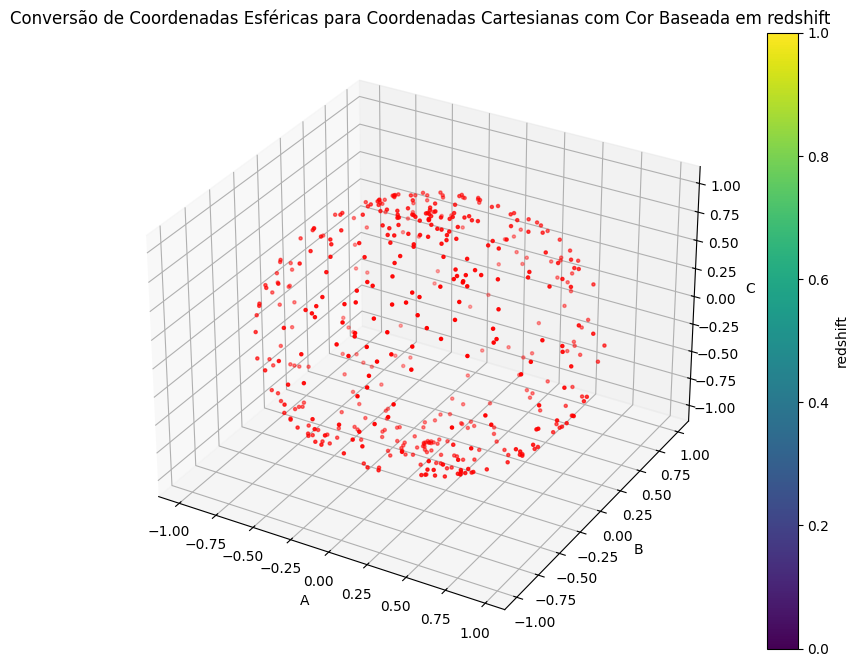

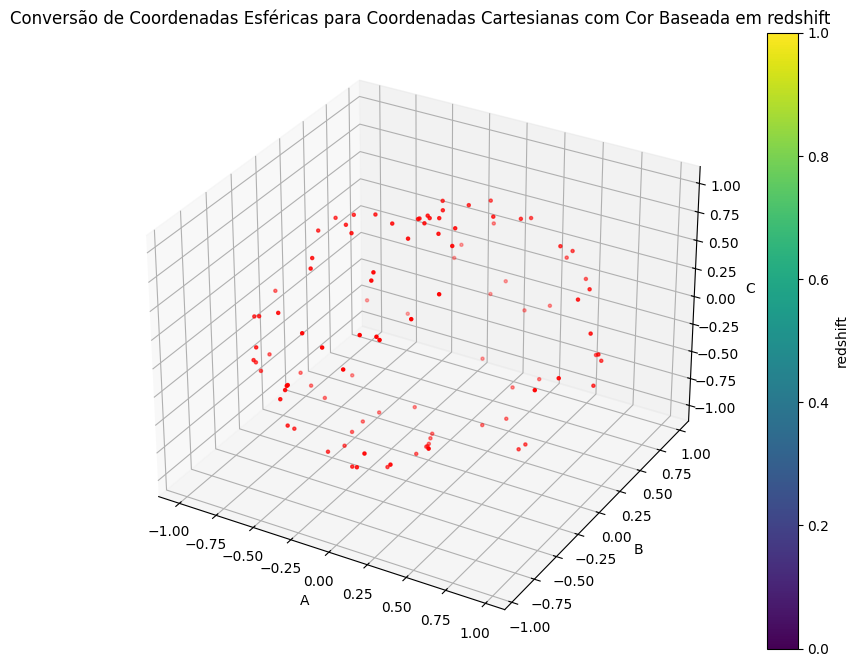

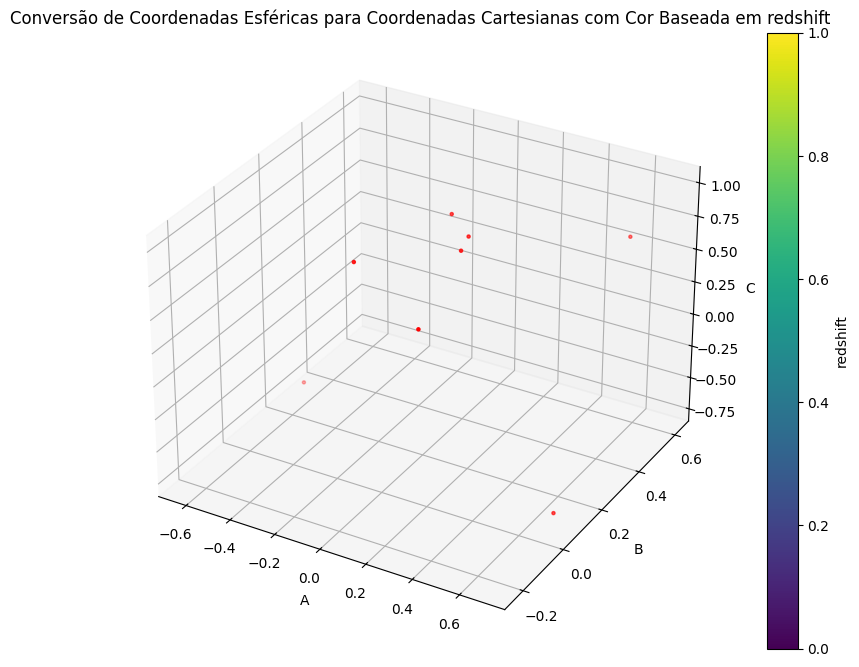

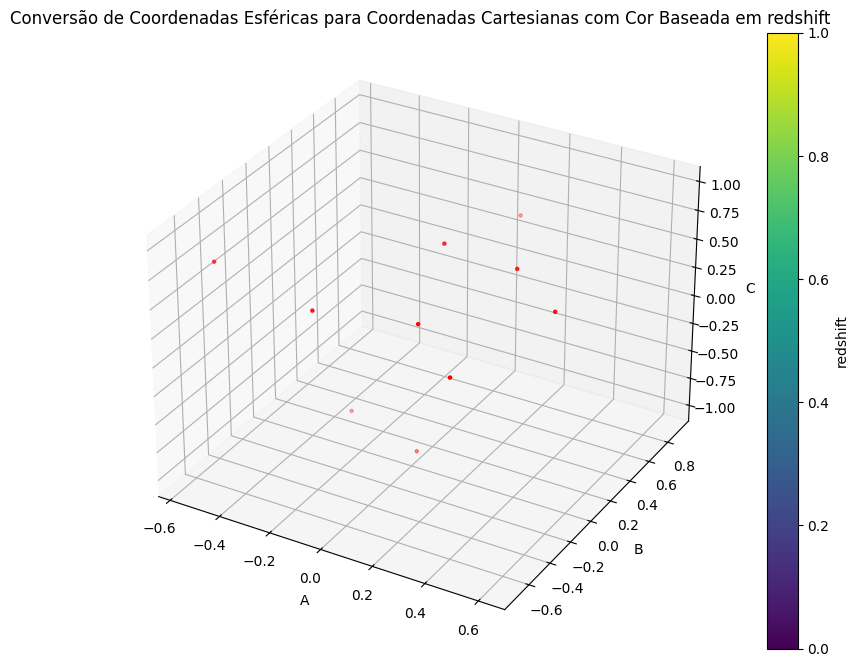

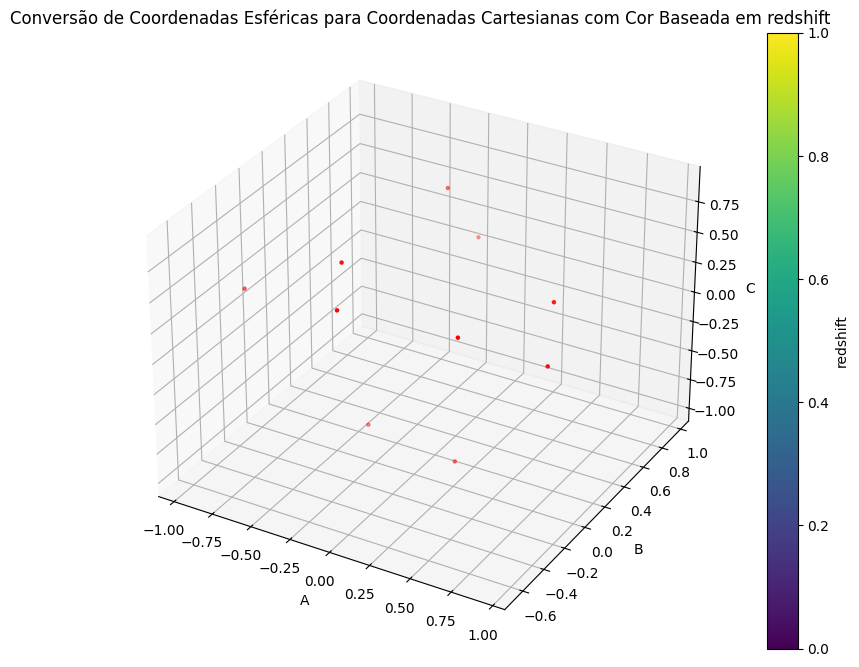

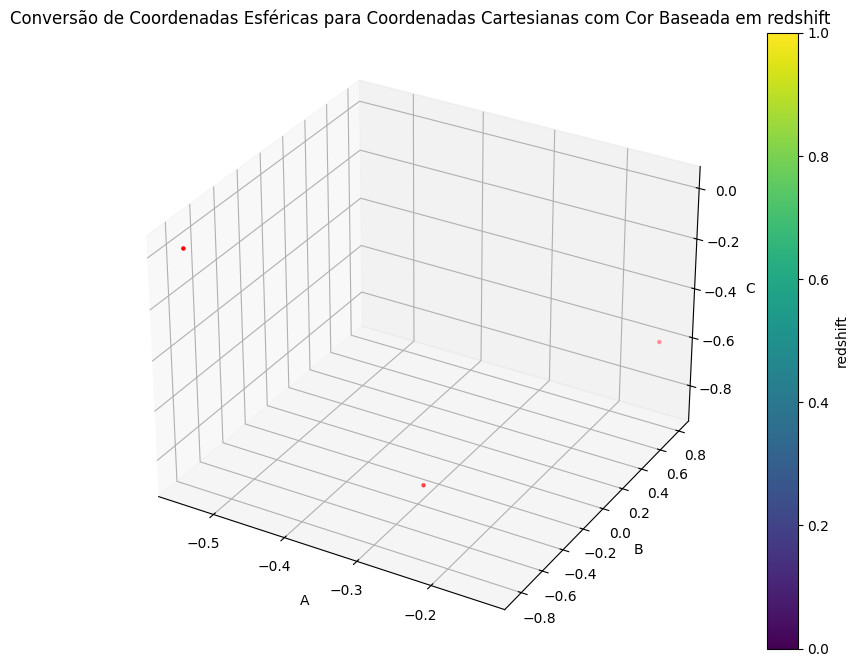

In [25]:
for i in range(8):
    df_redshift = df.copy()
    df_redshift = df_redshift[(df_redshift['redshift'] >= i) & (df_redshift['redshift'] < i + 1)]
    a = df_redshift['a']
    b = df_redshift['b']
    c = df_redshift['c']
    plot_doido(df_redshift['redshift'], None)

In [26]:
df_redshift.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,a,b,c
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.237665e+18,271.381888,14.092834,23.239620,22.300910,21.453180,20.927673,20.824673,7.009907,-0.326227,-0.137008,-0.487328
std,4.531663e+12,111.939679,19.708940,1.958393,0.973159,0.457913,0.440974,1.191396,0.001431,0.209223,0.836367,0.461183
min,1.237661e+18,142.258572,0.019440,21.073610,21.238120,20.949070,20.514430,19.638630,7.008322,-0.548428,-0.835972,-0.882415
25%,1.237662e+18,236.557995,2.830182,22.416780,21.877180,21.258070,20.695540,20.226335,7.009308,-0.422840,-0.600321,-0.740712
50%,1.237663e+18,330.857418,5.640923,23.759950,22.516240,21.567070,20.876650,20.814040,7.010295,-0.297251,-0.364671,-0.599009
75%,1.237667e+18,335.943547,21.129532,24.322625,22.832305,21.705235,21.134295,21.417695,7.010699,-0.215127,0.212474,-0.289785
max,1.237670e+18,341.029675,36.618140,24.885300,23.148370,21.843400,21.391940,22.021350,7.011103,-0.133002,0.789620,0.019439
